# K-Means Clustering

### Random 하게 생성된 toy dataset 으로 K-Means clustering test

make_blobs : 
```
    Input :
         n_samples :  cluster 에 균등 분할될 total data point 숫자  
         centers : generate 할 centroid 숫자  
         cluster_std : cluster 의 standard deviation    

    Output : 
        X: 생성된 sample 들  
        y: 각 sample 의 label
```
KMeans :  
> init : initialization method -> k-means++ (smart choosing of centroids)  
> n_clusters : k 값  
> n_init : 반복횟수  

DBSCAN :

>eps : epsilon (radius)  
>min_sample : minimum samples within the radius

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(101)

In [3]:
centroidLocation = [[3,2], [1,-1],[-1,2]]

X, _ = make_blobs(n_samples=1500, centers=centroidLocation)

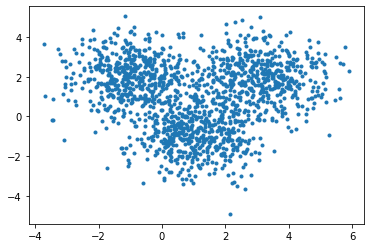

In [4]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [5]:
print(X.shape)
print(X[:10])

(1500, 2)
[[-1.21729731  0.34549836]
 [-1.21658421 -1.87049396]
 [ 4.14277516  2.67891613]
 [ 1.2492407   0.54037484]
 [ 4.09955027  0.97450081]
 [ 0.92034431 -0.64397538]
 [ 0.61013832 -0.57942099]
 [ 1.98458314 -2.18392424]
 [-0.24473773  2.72739937]
 [-1.29350714  0.90821259]]


In [6]:
nclusters = 3

In [7]:
k_means = KMeans(n_clusters=nclusters)

In [8]:
k_means.fit(X)

C:\Users\trimu\anaconda3\envs\tf20\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
k_means.labels_

array([1, 0, 2, ..., 0, 1, 1])

In [10]:
centers = k_means.cluster_centers_
centers

array([[ 1.04947716, -0.96785563],
       [-0.97543602,  2.04214001],
       [ 3.14699007,  2.02314162]])

In [11]:
from matplotlib.colors import ListedColormap

colors_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
colors_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

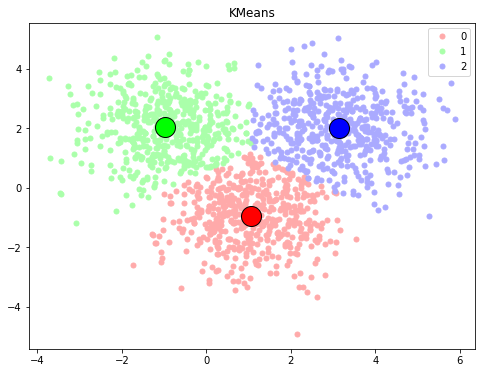

In [12]:
plt.figure(figsize=(8,6))

for i in range(nclusters):
    members = k_means.labels_ == i
    plt.plot(X[members, 0], X[members, 1], '.', 
             color=colors_light(i), markersize=10, label=i)
    plt.plot(centers[i, 0], centers[i, 1], 'o', 
             color=colors_bold(i), markeredgecolor='k', markersize=20)

plt.title("KMeans")
plt.legend()

# DBSCAN

- outlier 가 있는 data points를 생성하고 DBSCAN 알고리즘이 outlier를 검출하는지 test

In [3]:
from sklearn.cluster import DBSCAN

X1, _ = make_blobs(n_samples=500, centers=[[-3,-3]])
X2, _ = make_blobs(n_samples=500, centers=[[3,3]])
X3 = np.random.rand(500, 2) * 3 + 4
X4 = np.random.randn(10, 2) * 3  #outlier

X1.shape, X2.shape, X3.shape, X4.shape

((500, 2), (500, 2), (500, 2), (10, 2))

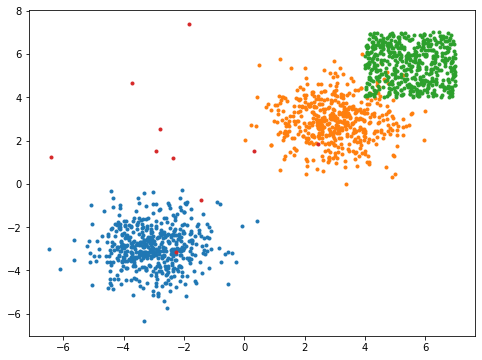

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.scatter(X2[:, 0], X2[:, 1], marker='.')
plt.scatter(X3[:, 0], X3[:, 1], marker='.')
plt.scatter(X4[:, 0], X4[:, 1], marker='.')

In [15]:
X = np.vstack([X1, X2, X3, X4])
X.shape

(1510, 2)

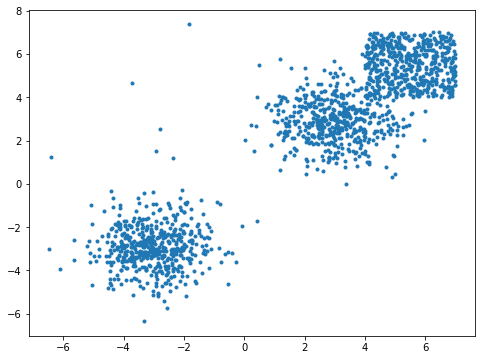

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [17]:
epsilon = 0.3
minimumSamples = 7

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)

labels = db.labels_

print(labels.shape)
print(labels)
print(db.core_sample_indices_.shape)
print(db.core_sample_indices_)

(1510,)
[ 0  0 -1 ...  4 -1 -1]
(1234,)
[   0    1    3 ... 1499 1505 1507]


In [18]:
unique_labels = set(labels)       # -1 : outlier
unique_labels

{-1, 0, 1, 2, 3, 4, 5}

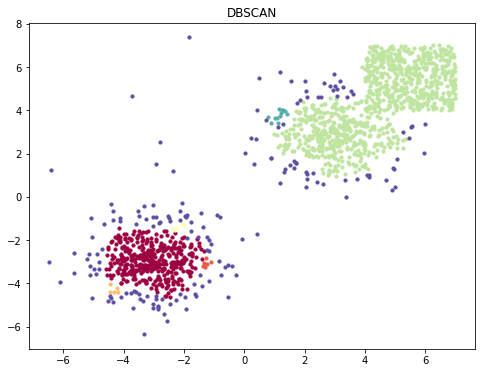

In [19]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    members = (labels == k)
    plt.scatter(X[members, 0], X[members, 1], color=col, 
                marker='o', s=10)

plt.title('DBSCAN')
plt.show()